<div class="cite2c-biblio"></div><img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> INF-493 - Machine Learning</h1>
    <h1> Tarea 1 - Metodos Lineales para Regresión </h1>
</center>
<p>
<br><center>_Javier Reyes_<strong> - </strong>_javier.reyes.12@sansano.usm.cl_<strong> - </strong>_201273524-6_ </center>
<br><center>_Marco Salinas_<strong> - </strong>_marco.salinas.12@sansano.usm.cl_<strong> - </strong>_201273589-0_ </center>
</p>

#  1 Tipos de fronteras en Clasificación


In [4]:
import numpy as np
from sklearn.utils import check_random_state

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

<p  style="text-align: justify;"> 
    **(a)** Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un
shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color
naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con
el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada
conjunto y visualícelos.
</p>

In [6]:
import matplotlib.pyplot as plt

X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

<p  style="text-align: justify;"> 
    **(b)** Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.
</p>

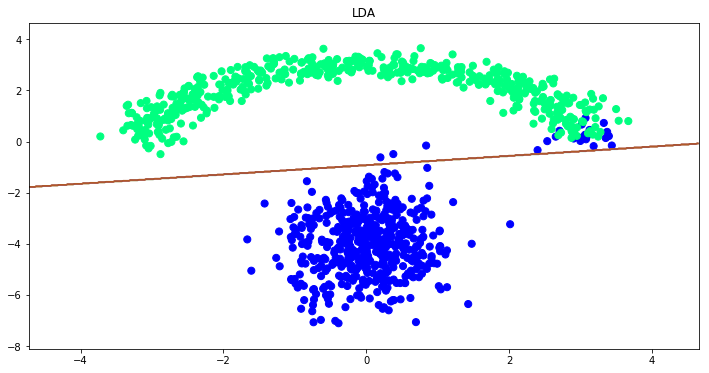

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X,y)
visualize_border(model_LDA,X,y,"LDA")

<p  style="text-align: justify;"> 
    Se puede observar que el conjuto de datos 1 esta separado de una manera uniforme, pero en uno de sus extremos se mezclan con los datos del conjunto 2, haciendo imposible una separación para discriminar los datos con el algoritmo de LDA. La única manera de poder utilizar el clasificador, es eliminando los outlayers, aunque esto es muy riesgoso porque pueden ser información valiosa.
</p>

<p  style="text-align: justify;"> 
    **(c)** Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribucién de probabilidad asumen cada uno?

</p>

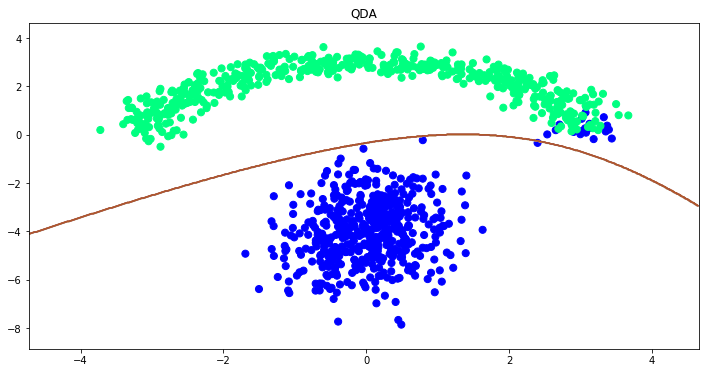

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA()
model_QDA.fit(X,y)
visualize_border(model_QDA,X,y,"QDA")

<p  style="text-align: justify;"> 
    **(d)** Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.

</p>

In [9]:
from sklearn.metrics import accuracy_score

y_pred_qda = model_QDA.predict(X)
y_pred_lda = model_LDA.predict(X)
print("Miss Classification Loss for LDA: %f"%(1-accuracy_score(y, y_pred_lda)))
print("Miss Classification Loss for QDA: %f"%(1-accuracy_score(y, y_pred_qda)))



Miss Classification Loss for LDA: 0.023000
Miss Classification Loss for QDA: 0.019000


<p  style="text-align: justify;"> 
    **(e)** Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma $l_2$), experimente con distintos valores del par´ametro de regularizaci´on
mediante el gr´afico interactivo. Explique el significado y efecto esperado de este par´ametro. Analice
cualitativamente lo observado.

</p>

In [10]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model

p_min = 0.001
p_max = 1
interactive(visualize_border_interactive,param=(p_min,p_max, 0.001))

A Jupyter Widget

<p  style="text-align: justify;"> 
    **(f)** Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

</p>

In [ ]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

#use interactive
p_min = 0.0001
p_max = 1
interactive(visualize_border_interactive,param=(p_min,p_max, 0.001))

<p  style="text-align: justify;"> 
    **(g)** Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.
</p>

In [ ]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

#use interactive
p_min = 0.0001
p_max = 1
interactive(visualize_border_interactive,param=(p_min,p_max, 0.001))

<p  style="text-align: justify;"> 
    **(h)** Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profunidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.
</p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree


def train_model(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

#use interactive
p_min = 1
p_max = 5
interactive(visualize_border_interactive,param=(p_min,p_max, 0.001))

<p  style="text-align: justify;"> 
    **(i)** Construya un algoritmo $k-NN$ para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro $k$. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

</p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model


p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

# 2 Análisis de audios como datos brutos

<p  style="text-align: justify;"> 
    **(a)** Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

</p>

In [ ]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100

def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

<p  style="text-align: justify;"> 
    **(b)** Lea los archivos _.wav_ y transformelos en secuencias de tiempo. Realice un _padding_ de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

</p>

In [ ]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelled')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='path/to/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))


<p  style="text-align: justify;"> 
    **(c)** Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

</p>

In [ ]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
             1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
             2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

<p  style="text-align: justify;"> 
    **(d)**  Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.


</p>

In [ ]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

<p  style="text-align: justify;"> 
    **(e)** Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?

</p>

In [ ]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

<p  style="text-align: justify;"> 
    **(f)** Para pre procesar la secuencia en el tiempo realice una Transformada de Fourier discreta para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.

</p>

In [ ]:
X_fourier = np.abs(np.fft.fft(X))

<p  style="text-align: justify;"> 
    **(g)**  Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?


</p>

In [ ]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)

X_resampled = np.array(X_resampled)
X_resampled.shape

<p  style="text-align: justify;"> 
    **(h)**  Genere un conjunto de pruebas mediante la técnica _hold-out validation_ para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?



</p>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=43)

<p  style="text-align: justify;"> 
    **(i)**  Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.
</p>

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p  style="text-align: justify;"> 
    **(j)**  Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.
</p>

In [ ]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)


<p  style="text-align: justify;"> 
    **(k)**  Entrene un modelo de Regresión Logística variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion $C$ en el mismo rango que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.
</p>

In [ ]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]

<p  style="text-align: justify;"> 
    **(l)**  Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro ´
regularizador max depth, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.
</p>

In [ ]:
Depths = range(1,30)


<p  style="text-align: justify;"> 
    **(m)**  Experimente con diferentes dimensiones $d$ para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.
</p>

<p  style="text-align: justify;"> 
    **(n)**  Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en $2$ dimensiones.
</p>

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

<p  style="text-align: justify;"> 
    **(o)**  Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.
</p>

<p  style="text-align: justify;"> 
    **(p)**  Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterísticas (_feature crafting_) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6] [7] si desea.
</p>

- [6]  https://www.kaggle.com/primaryobjects/voicegender/data
- [7]  Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition: A Review. vol, 5, 58-63.


# 3 Análisis de emociones en tweets

<p  style="text-align: justify;"> 
    **(a)**  Construya un dataframe con los datos a analizar. Determine cu´antas clases existen, cu´antos registros
por clase y describa el _dataset_.

</p>

In [ ]:
import pandas as pd
df = pd.read_csv('./emotionanalysis/text_emotion.csv')

<p  style="text-align: justify;"> 
    **(b)**  Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos.
</p>

In [ ]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]


<p  style="text-align: justify;"> 
    **(c)**  Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato est´andarizado
en el cual se podr´an trabajar.

</p>

<p  style="text-align: justify;"> 
    **(d)**  Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.

</p>

<p  style="text-align: justify;"> 
    **(a)**  Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets ${ti}_{i=1}^{n}$ disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la uni´on de
todas las palabras que se observen en los tweets.

</p>
<p  style="text-align: justify;">
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text [12] (_CountVectorizer_ y _TfidfVectorizer_). Recuerde realizar el ajuste (_fit_) únicamente con el conjunto de entrenamiento, para luego transformar el conjunto de pruebas (con el método transform).

</p>


- [12] http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature

<p  style="text-align: justify;"> 
    **(f)**  Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

</p>

<p  style="text-align: justify;"> 
    **(g)**  Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?


</p>

In [ ]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(y_test, model.predict(X_test), target_names=['+','-']))

<p  style="text-align: justify;"> 
    **(h)**  [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente, tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el clasificador a cada clase.

</p>

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
    print sentiment, text


<p  style="text-align: justify;"> 
    **(i)**  Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada _tweet_. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.


</p>

<p  style="text-align: justify;"> 
    **(j)**  Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada _tweet_, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

</p>

<p  style="text-align: justify;"> 
    **(k)**  Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest [14]
</p>

- [14]  http://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)


<p  style="text-align: justify;"> 
    **(l)**  Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

</p>

In [ ]:
LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')

<p  style="text-align: justify;"> 
    **(m)**  Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?


</p>